### Question

In [1]:
# Import Necessary Libraries

import selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
import bs4
from bs4 import BeautifulSoup
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load the path for the webdriver and maximize the window
s = Service('C:/Users/prasa/Desktop/chromedriver')
driver=webdriver.Chrome(service=s)
driver.maximize_window()

# Enter Required URL
driver.get('https://www.instagram.com/')

In [3]:
#Define a function to login for instagram
def login(driver,username,password):
    wait = WebDriverWait(driver, 10)
    
    #locate the username text box and pass username
    wait.until(EC.presence_of_element_located((By.NAME,"username")))
    user = driver.find_element(By.NAME,"username")
    user.send_keys(user_name)

    #locate the password text box and pass password
    password=driver.find_element(By.NAME,'password')
    password.send_keys(user_password)

    #Locate the Login Button and click on it to login
    login=driver.find_element(By.CLASS_NAME,'y3zKF')
    login.submit()

    #turning off notification pop up which comes on logging in
    pop_up=wait.until(EC.presence_of_element_located((By.XPATH,'/html/body/div[1]/section/main/div/div/div/div/button')))
    pop_up.click()
    notification_on=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'bIiDR')))
    notification_on.click()

In [4]:
#give username and password to the function to login
user_name = "SAMPLE USERNAME"
user_password = "SAMPLE PASSWORD"
login(driver, user_name, user_password)#function defined above
print("Login Successfully")#print the dialogue after login successfully

Login Successfully


## Answer 1.1

### From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [5]:
#Define a function to search a name

def search(profile):
    #locate search bar
    search=driver.find_element(By.CLASS_NAME,'XTCLo')
    #clear the search bar history if any
    search.clear()
    #send keyword you want to search
    search.send_keys(profile)
    #to wait 2sec to load
    time.sleep(2)
    
#define a function to change the followers count from string to integers

def str_to_int(str_):
    str_ = str(str_) 
    str_ = str_.replace(",", "") #Converting string followers to integer
    for i in str_:
        if i == ".": 
            str_ = str_.replace(".", "")
            str_ = str_.replace("k", "00") #Replace "K" followers to 1000 round off fig 
            str_ = str_.replace("m", "00000") #Replace "M" followers to 100,000 Million round off fig
        else:
            str_ = str_.replace("k", "000")
            str_ = str_.replace("m", "000000")            
    str_ = int(str_)
    return str_

#Define a function to get followers

def get_followers_count(driver):
    #click on the post to open it
    #locate the followers to get its count
    path1='/html/body/div[1]/section/main/div/header/section/ul/li[2]/a/span'
    followers=wait.until(EC.presence_of_element_located((By.XPATH,path1)))
    k=str_to_int(followers.text)#function defined above
    return k
    time.sleep(5)

In [7]:
search('food')#function defined above
#locate the searchbar and search for required name

#Locate and find the 1st 10 handles
wait=WebDriverWait(driver, 5)
wait.until(EC.presence_of_element_located((By.CLASS_NAME,'qyrsm')))
#find the handles appear after search for the profile you want and assign to a list
handles_lst=driver.find_elements(By.CLASS_NAME,'qyrsm')

lst=[]
for i in handles_lst[8:]:
    if len(lst)<10:#here we want 10 handles
        if i.get_attribute('innerHTML')[0]!='#':#here we get name of the each handles
            lst.append(i.get_attribute('innerHTML'))
            
#Run a for loop to get the followers count for every handle
name_and_followers_count={} # create empty dictionary for handle and followers count
for i in lst:
    search(i)#function defined above
    #after search the each hundle,click on it by using the path to open the handle
    path='/html/body/div[1]/section/nav/div[2]/div/div/div[2]/div[3]/div/div[2]/div/div[1]/a/div/div[2]/div[1]/div/div/div'
    wait.until(EC.presence_of_element_located((By.XPATH,path))).click()
    time.sleep(3)
    
    count=get_followers_count(driver)#function defined above
    name_and_followers_count[i]=count
#sort the dictionary to get top 5 followers count
sort_name_and_followers_count={k: v for k,v in sorted(name_and_followers_count.items(), key=lambda item:item[1],reverse=True)[:5]}


print('Top 5 Handles which have the highest number of followers')
c=0 #used to print the index
for i in sort_name_and_followers_count:
    if c==10:
        break
    print(c+1,'.',i,sort_name_and_followers_count[i])
    c+=1
    
#get back to homepage
driver.get('https://www.instagram.com/')
time.sleep(2)

Top 5 Handles which have the highest number of followers
1 . foodie_incarnate 1000000
2 . foodzeee 1000000
3 . justtt_food 369000
4 . village_food_factory_official 309000
5 . delhifoodwalks 158000


## Answer 1.2

### Now Find the number of posts these handles have done in the previous 3 days.

In [8]:
#define a function to search and open the profile

def search_and_open(profile):
    #Locate the searchbar and search for the required profile
    search = driver.find_element(By.CLASS_NAME,"XTCLo")
    #clear the search bar history if any
    search.clear()
    #pass the the required profile in the search bar
    search.send_keys(profile)
    #wait 2sec to load
    time.sleep(2)
    
    #using path to locate the profile appear and open the profile by click on it
    wait = WebDriverWait(driver, 20)
    path='/html/body/div[1]/section/nav/div[2]/div/div/div[2]/div[3]/div/div[2]/div/div[1]/a/div/div[2]/div[1]/div/div/div'
    open_profile=wait.until(EC.presence_of_element_located((By.XPATH,path)))
    open_profile.click() # to click the profile to open

In [9]:
#Define a function to get number of posts required handles have posted in the previous 3 days.  
def count_posts(profile):
    wait = WebDriverWait(driver, 10)
    search_and_open(profile)#function defined above
    time.sleep(3)

    #check for posts,if available try this otherwise go to exception
    try:
        #check for the 1st post and click by using class name
        post_1=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'_bz0w')))
        post_1.click()
        
        #initially take count for the posts are zero
        count=0
        #create a list,to check the posts are posted in previous 3days
        li=['day','days','minute','minutes','hour','hours','second','seconds']

        while True: #loop runs until break
            #locate the date/time of post 
            wait.until(EC.presence_of_element_located((By.CLASS_NAME,'c-Yi7')))

            #by using BeautifulSoup, get the date/time string present in the post by using its class
            data = driver.page_source
            html_data = BeautifulSoup(data, 'html.parser')
            date=html_data.find(class_='c-Yi7')
            date=date.time.string
            arr_date=date.split()

            if arr_date[1] in li:
                if arr_date[1] in ['day','days']:
                    if int(arr_date[0]) <= 3:
                        count+=1
                        #locate the next button and click, to go for next post
                        next=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'l8mY4')))
                        next.click()
                        
                    else: #if the above  if condition fails ,breaks the loop
                        break

                else:
                    count+=1
                    #locate the next button and click, to go for next post
                    next=wait.until(EC.presence_of_element_located((By.CLASS_NAME,'l8mY4')))
                    next.click()

            else: #if the above  if condition fails ,breaks the loop
                break

        #Locate the close button and click after loop break
        close_path='/html/body/div[6]/div[1]/button'
        close=wait.until(EC.presence_of_element_located((By.XPATH,close_path)))
        close.click()
    except: #its runs if their is no posts,instead of error it prints the below text
        print('Their is no Posts posted yet')
                    
    return count #it gives the final output
#get back to homepage
driver.get('https://www.instagram.com/')
time.sleep(2)

In [10]:
names=[]
for i in sort_name_and_followers_count:#by previous question,to get the handles names
    names.append(i)
    
posts={}
for i in names:
    posts[i]=count_posts(i)#function defined above

for i in posts:
    print('Number of posts of',i,"in past 3 days =",posts[i])

Number of posts of foodie_incarnate in past 3 days = 6
Number of posts of foodzeee in past 3 days = 2
Number of posts of justtt_food in past 3 days = 11
Number of posts of village_food_factory_official in past 3 days = 0
Number of posts of delhifoodwalks in past 3 days = 10


## Answer 1.3

### Depict this information using a suitable graph.

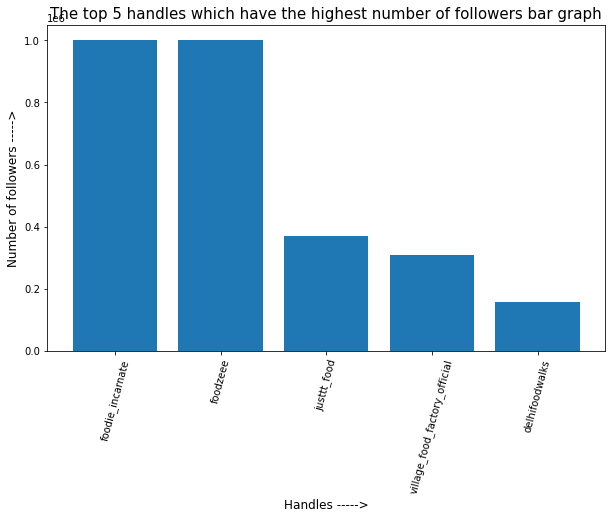

In [11]:
x,y=[],[]

for i in sort_name_and_followers_count:
    x.append(i)
    y.append(sort_name_and_followers_count[i])

#Plot Bar Graph
plt.figure(figsize=(10,6))
plt.bar(x,y)
plt.title('The top 5 handles which have the highest number of followers bar graph',fontsize=15)
plt.xlabel('Handles ----->',fontsize=12)
plt.ylabel('Number of followers ----->',fontsize=12)

plt.xticks(rotation=75)
plt.show()

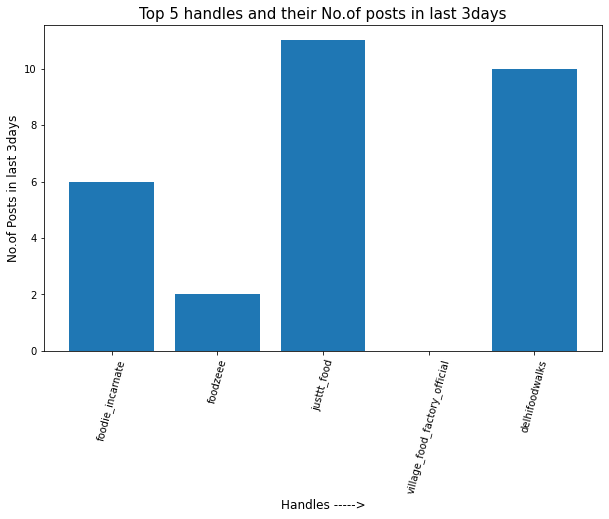

In [12]:
x,y=[],[]
for i in posts:
    x.append(i)
    y.append(posts[i])

#Plot Bar Graph
plt.figure(figsize=(10,6))
plt.bar(x,y)
plt.title('Top 5 handles and their No.of posts in last 3days',fontsize=15)
plt.xlabel('Handles ----->',fontsize=12)
plt.ylabel('No.of Posts in last 3days',fontsize=12)

plt.xticks(rotation=75)
plt.show()

## Answer 2.1

### Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [13]:
#define a function to scrape the content
def scrape_content(profile):
    search_and_open(profile) #function Defined above
    time.sleep(3)
    wait=WebDriverWait(driver, 10)
    
    #Locate the path for the 1st post and open it
    path='/html/body/div[1]/section/main/div/div[3]/article/div[1]/div/div[1]/div[1]'
    post_1=wait.until(EC.presence_of_element_located((By.XPATH,path)))
    post_1.click()
    
    content_lst=[]
    for i in range(10):
        #Locate the 1st content of the post by its path
        path1='/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/span'
        content_1st=wait.until(EC.presence_of_element_located((By.XPATH,path1)))

        #by using BeautifulSoup,get the required content by using class
        data=driver.page_source
        html_data=BeautifulSoup(data,'html.parser')

        content_data=html_data.find(class_ = 'C4VMK')
        c=content_data.contents[1]

        #split by # to separte the hashtags and content
        content_lst.append(c.text.split('#')[0])

        #to go next post
        next=driver.find_element(By.CLASS_NAME,'l8mY4')
        next.click()

    #after complete the loop,close the post by locate the close button by its path and click on it to close
    close_path='/html/body/div[6]/div[1]/button'
    close=wait.until(EC.presence_of_element_located((By.XPATH,close_path)))
    close.click()
    
    return content_lst

#get back to homepage
driver.get("https://www.instagram.com/")
time.sleep(2)

In [14]:
names=[]
for i in sort_name_and_followers_count:#by previous question
    names.append(i)

print("Instagram Handles and their latest 10 posts content")
print()
for i in names:
    contents=scrape_content(i)#function defined above
    print(i,':')
    print()
    
    for j in range(len(contents)):
        print(j+1,'.',contents[j])
        print()
    print('<--------------------------------------------------------->')
    print()

Instagram Handles and their latest 10 posts content

foodie_incarnate :

1 . 6 in 1 Sursuri Papdi Chaat of Lucknow😯😯.Kindly watch the full video for location, price & other details🤗🤗.

2 . Heart Attack Burger😱😱.Watch the full video on my YouTube channel. Link is in my bio🤗🤗.

3 . Lunch scenes at Cross Avenue, @radissongreaternoida 🤩🤩Delicious food, heart warming hospitality..this place is too good.👍🏻.

4 . Most Unique Faluda, 40Rs/- Only😯😯.Kindly watch the full video for location, price & other details🤗🤗.

5 . Making of Karachi Halwa🤩🤩.Watch the full video on my YouTube channel. Link is in my bio🤗🤗.

6 . Come on! Lets do Samosa party🤩🤩.Had these at Janpath in Delhi. Priced at just ₹10 for 6 samosas, these tiny samosas are more delicious than normal sized samosa because in every bite of these you will get the cispy outer layer as well, whereas after you have eaten the normal sized samosas from outside, only the stuffing is left which doesn't taste as good without that outer crisp layer.

## Answer 2.2

### Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [15]:
#define a function to make a dictionary for frequency of each word
def frq_word_dict(profile):
    search_and_open(profile)#function defined above
    time.sleep(3)
    wait=WebDriverWait(driver, 15)
    
    #locate the 1st post by its path and open it by click
    path='/html/body/div[1]/section/main/div/div[3]/article/div[1]/div/div[1]/div[1]'
    post_1=wait.until(EC.presence_of_element_located((By.XPATH,path)))
    post_1.click()
    
    for i in range(10):
        #locate the 1st content of the post by its path
        path1='/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/span'
        content_1st=wait.until(EC.presence_of_element_located((By.XPATH,path1)))
        
        #By using BeautifulSoup,get the content of the post by class
        data=driver.page_source
        html_data=BeautifulSoup(data,'html.parser')
        
        content_data=html_data.find(class_ = 'C4VMK')
        c=content_data.contents[1]
        c=c.text.split('#')[0] # to separate text and hashtags
        c=c.replace(',','')
        for j in c.split('.'):
            for i in j.split(' '):
                i=i.lower()
                dict_words[i]=dict_words.get(i,0)+1 #add to the dictionary created externally
                
        #to go next post
        next=driver.find_element(By.CLASS_NAME,'l8mY4')
        next.click()
      
    #close the post after loop complete by locate the close button by its path
    close_path='/html/body/div[6]/div[1]/button'
    close=wait.until(EC.presence_of_element_located((By.XPATH,close_path)))
    close.click()

#get back to homepage
driver.get("https://www.instagram.com/")
time.sleep(2)

In [17]:
#Create a empty dictionary mentioned in the frq_word_dict function
dict_words=dict()

names=[]
for i in sort_name_and_followers_count:#by previous question
    names.append(i)

print("Frequency of each word")
for i in names:
    frq_word_dict(i)
    
for i,j in dict_words.items():
    print(i,j)

Frequency of each word
6 2
in 28
1 5
sursuri 1
papdi 1
chaat 2
of 16
lucknow😯😯 1
kindly 4
watch 9
the 30
full 10
video 14
for 19
location 4
price 4
& 6
other 4
details🤗🤗 4
 137
heart 2
attack 1
burger😱😱 1
on 26
my 15
youtube 23
channel 15
link 11
is 10
bio🤗🤗 3
lunch 3
scenes 1
at 6
cross 1
avenue 1
@radissongreaternoida 1
🤩🤩delicious 1
food 5
warming 1
hospitality 1
this 6
place 4
too 1
good 2
👍🏻 1
most 1
unique 1
faluda 1
40rs/- 1
only😯😯 1
making 5
karachi 1
halwa🤩🤩 1
come 1
on! 1
lets 1
do 2
samosa 2
party🤩🤩 1
had 1
these 4
janpath 1
delhi 1
priced 1
just 4
₹10 1
samosas 3
tiny 1
are 4
more 7
delicious 3
than 1
normal 2
sized 2
because 2
every 1
bite 2
you 5
will 3
get 1
cispy 1
outer 2
layer 2
as 3
well 1
whereas 1
after 1
have 3
eaten 1
from 3
outside 1
only 1
stuffing 1
left 1
which 1
doesn't 1
taste 1
without 3
that 4
crisp 1
recommended👍🏻 1
ponk😯😯 1
insane 1
khus 1
india😱😱 1
million 1
special 2
video❤🤗 1
👑 1
first 2
indian 3
blogger 2
to 14
hit 1
1million 1
followers 2
instagram

## Answer 2.3

### Create a csv file with two columns : the word and its frequency

In [18]:
words_list=[] #List of list containg words and frequency

for i,j in dict_words.items():
    words_list.append([i,j])
    
df=pd.DataFrame(words_list,columns=['Word','Frequency']) #create a dataframe

# create a CSV file
df.to_csv('words_and_frequncy_csvfile.csv',index=False)
print('CSV File for word and frequency is created') #print this dialogue after creating csv file successfully

CSV File for word and frequency is created


## Answer 2.4

### Now, find the hashtags that were most popular among these bloggers

In [19]:
#define a function to make a dictionary for frequency of each word
def frq_hashtags_dict(profile):
    search_and_open(profile) #function Defined above
    time.sleep(3)
    
    wait=WebDriverWait(driver, 10)
    #Locate the 1st post by its path and open by click
    path='/html/body/div[1]/section/main/div/div[3]/article/div[1]/div/div[1]/div[1]'
    post_1=wait.until(EC.presence_of_element_located((By.XPATH,path)))
    post_1.click()
    
    for i in range(10):
        #Locate the 1st content for the post by its path
        path1='/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/span'
        content_1st=wait.until(EC.presence_of_element_located((By.XPATH,path1)))
        
        #by using BeautifulSoup, get the text for the 1st content by class
        data=driver.page_source
        html_data=BeautifulSoup(data,'html.parser')
        
        content_data=html_data.find(class_ = 'C4VMK')
        c=content_data.contents[1]
        c=c.text.split('#')#to separate the text and hashtags

        for i in c[1:]:
            dict_hashtags[i]=dict_hashtags.get(i,0)+1 #add hashtag and frequency to the dictionary create externally
            
        #to go next post
        next=driver.find_element(By.CLASS_NAME,'l8mY4')
        next.click()
    
    #close the post after loop complete by locate the close button and click
    close_path='/html/body/div[6]/div[1]/button'
    close=wait.until(EC.presence_of_element_located((By.XPATH,close_path)))
    close.click()

#get back to homepage
driver.get("https://www.instagram.com/")
time.sleep(2)

In [20]:
#Create a empty dictionary mentioned in the frq_hashtags_dict function
dict_hashtags=dict()

names=[]
for i in sort_name_and_followers_count:#by previous question
    names.append(i)

for i in names:
    frq_hashtags_dict(i)
    
#sorting in desc order   
sort_hashtag={k: v for k,v in sorted(dict_hashtags.items(), key=lambda item:item[1],reverse=True)[:10]}

print("The top 10 hashtags that were most popular among these bloggers and number of times used :-->")

c=0 #used to print index
for i in sort_hashtag:
    if(c==10):
        break
    print(c+1,i,"->",sort_hashtag[i])
    c+=1

The top 10 hashtags that were most popular among these bloggers and number of times used :-->
1 reelkarofeelkaro  -> 14
2 indianfood  -> 12
3 foodlover  -> 12
4 streetfood  -> 12
5 reelitfeelit  -> 11
6 reelsinstagram  -> 9
7 foodzeee -> 9
8 justttfood  -> 9
9 foodieincarnate  -> 8
10 foodiesofinstagram  -> 8


## Answer 2.5

### Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

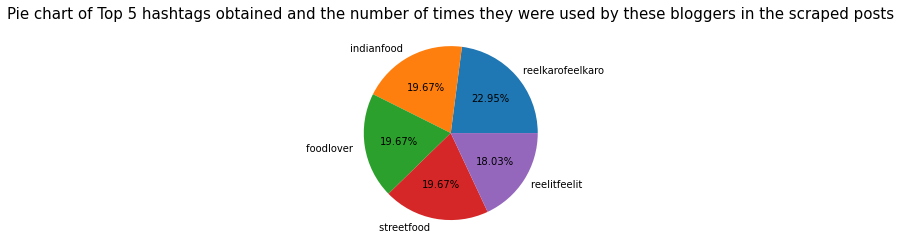

In [21]:
c=0 #used to run a loop for required times
x=[]
y=[]
for i in sort_hashtag:
    if(c==5):
        break
    x.append(i)
    y.append(sort_hashtag[i])
    c+=1
    
#plot pie chart
plt.pie(y,labels=x, autopct = '%.2f%%')
plt.title('Pie chart of Top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts',fontsize=15)
plt.show()

## Answer 3.1

### Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [22]:
#Define a function to get number of likes per post
def likes_count(profile):
    search_and_open(profile) # function defined above
    time.sleep(2)
    
    #create a empty list for likes for the post
    likes_lst=[]
    wait=WebDriverWait(driver,15)
    
    #Locate the 
    path='/html/body/div[1]/section/main/div/div[3]/article/div[1]/div/div[1]/div[1]/a/div[1]/div[2]'
    post_1=wait.until(EC.presence_of_element_located((By.XPATH,path)))
    post_1.click()
    
    #run a loop for 10times to get 10posts
    for i in range(10):
        #try for Reels and posts,if not then go to exception
        try:
            wait.until(EC.presence_of_element_located((By.CLASS_NAME,'zV_Nj')))
            #by using beautifulsoup,get the text for views/likes
            data=driver.page_source
            html_data=BeautifulSoup(data,'html.parser')
            text=html_data.find(class_='zV_Nj').text.split(' ')
            if text[1]=='likes': #if it shows likes do it,otherwise(views) go for else
                likes=html_data.find(class_='zV_Nj').span.string
                likes=likes.replace(',','')
                likes=str_to_int(likes)#defined above to change string to integer
                likes_lst.append(likes)
            else:#run this only above text[1]=='views'
                wait.until(EC.presence_of_element_located((By.CLASS_NAME,'vcOH2'))).click()
                likes=driver.find_element(By.CLASS_NAME,'vJRqr').text.split()
                likes=likes[0]
                likes=likes.replace(',','')
                likes=str_to_int(likes)
                likes_lst.append(likes)

        except:#try this for videos
            wait.until(EC.presence_of_element_located((By.CLASS_NAME,'vcOH2')))
            #by using beautifulsoup,get the text for views/likes
            data=driver.page_source
            html_data=BeautifulSoup(data,'html.parser')
            text=html_data.find(class_='vcOH2').text.split()
            if text[1]=='likes': #if it shows likes do it,otherwise(views) go for else
                likes=html_data.find(class_='vcOH2').span.string
                likes=likes.replace(',','')
                likes=str_to_int(likes)
                likes_lst.append(likes)
            else: #run this only above text[1]=='views'
                wait.until(EC.presence_of_element_located((By.CLASS_NAME,'vcOH2'))).click()
                likes=driver.find_element(By.CLASS_NAME,'vJRqr').text.split()
                likes=likes[0]
                likes=likes.replace(',','')
                likes=str_to_int(likes)
                likes_lst.append(likes)

        #to go next post
        next=driver.find_element(By.CLASS_NAME,'l8mY4')
        next.click()
        time.sleep(3)
        
    #close the post after loop complete by locate the close button and click
    close_path='/html/body/div[6]/div[1]/button'
    close=wait.until(EC.presence_of_element_located((By.XPATH,close_path)))
    close.click()
    
    return likes_lst
    
#get back to homepage
driver.get("https://www.instagram.com/")
time.sleep(2)

In [23]:
names=[]
for i in sort_name_and_followers_count:#by previous question
    names.append(i)

#create a empty dictionary for the handles(key) and likes(value) for 10posts as a list
likes_dict={}

for i in names:
    likes=likes_count(i)
    likes_dict[i]=likes

print('likes of the top 10 posts of the 5 handles')
for i in likes_dict:
    print(i,':')
    print()
    c=0 # used to print index
    for j in likes_dict[i]:
        if c==10:
            break
        print(c+1,'.','Number of likes for post',c+1,'are',j)
        c+=1
    print('<-------------------------------------------------------->')
    print()

likes of the top 10 posts of the 5 handles
foodie_incarnate :

1 . Number of likes for post 1 are 3299
2 . Number of likes for post 2 are 28040
3 . Number of likes for post 3 are 17445
4 . Number of likes for post 4 are 18280
5 . Number of likes for post 5 are 31761
6 . Number of likes for post 6 are 27379
7 . Number of likes for post 7 are 18220
8 . Number of likes for post 8 are 266386
9 . Number of likes for post 9 are 14479
10 . Number of likes for post 10 are 19803
<-------------------------------------------------------->

foodzeee :

1 . Number of likes for post 1 are 33400
2 . Number of likes for post 2 are 122972
3 . Number of likes for post 3 are 48702
4 . Number of likes for post 4 are 49493
5 . Number of likes for post 5 are 134943
6 . Number of likes for post 6 are 55838
7 . Number of likes for post 7 are 78127
8 . Number of likes for post 8 are 86470
9 . Number of likes for post 9 are 31374
10 . Number of likes for post 10 are 124429
<-------------------------------------

## Answer 3.2

### Calculate the average likes for a handle.

In [24]:
#create a empty dictionary for handles as key and average likes as value
avg_likes={}

for i in likes_dict: # we use likes_dict from previous question
    like=sum(likes_dict[i])
    avg_likes[i]=like/10
    
print('Average Likes for an Handles :')
c=0 #used to print index
for i in avg_likes:
    if c==5:
        break
    print(c+1,'.','Avg likes of last 10 post of',i,'are',avg_likes[i])
    c+=1

Average Likes for an Handles :
1 . Avg likes of last 10 post of foodie_incarnate are 44509.2
2 . Avg likes of last 10 post of foodzeee are 76574.8
3 . Avg likes of last 10 post of justtt_food are 3694.5
4 . Avg likes of last 10 post of village_food_factory_official are 1010.3
5 . Avg likes of last 10 post of delhifoodwalks are 547.2


## Answer 3.3

### Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [25]:
#create a empty dictionary handles as keys and average followers as values
ratio={}

names=[]
for i in sort_name_and_followers_count: #using from previous questions
    names.append(i)
    
for i in names:
    ratio[i]=avg_likes[i]/sort_name_and_followers_count[i]

c=0 #used to print index
for i in ratio:
    if c==5:
        break
    print(c+1,'.','Ratio of likes to followers of last 10 post of', i,'is', ratio[i])
    c+=1

1 . Ratio of likes to followers of last 10 post of foodie_incarnate is 0.0445092
2 . Ratio of likes to followers of last 10 post of foodzeee is 0.0765748
3 . Ratio of likes to followers of last 10 post of justtt_food is 0.01001219512195122
4 . Ratio of likes to followers of last 10 post of village_food_factory_official is 0.00326957928802589
5 . Ratio of likes to followers of last 10 post of delhifoodwalks is 0.0034632911392405066


## Answer 3.4

### Create a bar graph to depict the above obtained information.

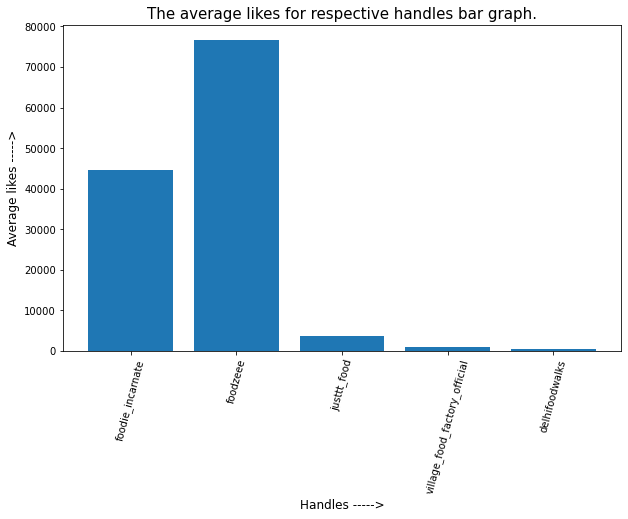

In [26]:
x,y=[],[]

for i in avg_likes:
    x.append(i)
    y.append(avg_likes[i])
    
#plotting bar graph.
plt.figure(figsize=(10,6))
plt.bar(x,y)
plt.title('The average likes for respective handles bar graph.',fontsize=15)
plt.xlabel('Handles ----->',fontsize=12)
plt.ylabel('Average likes ----->',fontsize=12)
plt.xticks(rotation=75)
plt.show()

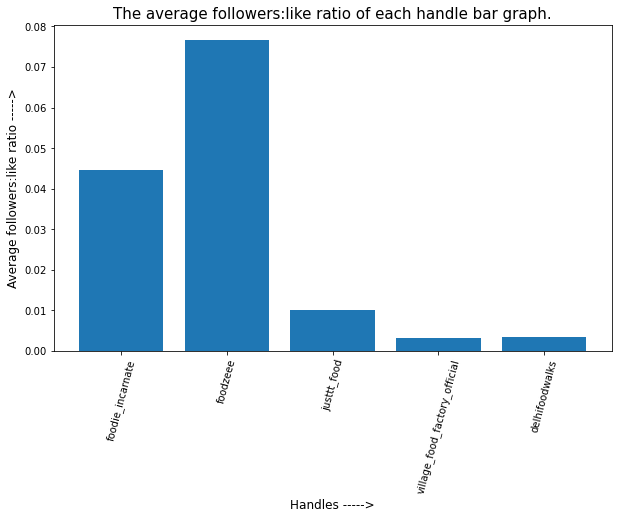

In [27]:
x,y=[],[]

for i in ratio:
    x.append(i)
    y.append(ratio[i])
    
#plotting bar graph.
plt.figure(figsize=(10,6))
plt.bar(x,y)
plt.title('The average followers:like ratio of each handle bar graph.',fontsize=15)
plt.xlabel('Handles ----->',fontsize=12)
plt.ylabel('Average followers:like ratio ----->',fontsize=12)
plt.xticks(rotation=75)
plt.show()